# Contexte de la démarche

Lapage est une librairie avec plusieurs boutiques physique.

A notre époque où la plupart des gens commandent leurs produits sur des sites web, l'entreprise a décidé de mettre en place son propre site de vente en ligne.

Deux ans après la mise en place de ce site, l'équipe marketing a décidé de faire le point sur la situation.

Quelques membres de l'équipe marketing ont demandé quelques analyses autour du chiffre d'affaire du site ainsi que des comportements clients. 

# Importation des librairies nécessaires

Nous commençons par importer ces quatres librairies qui seront nécessaires pour nettoyer nos données ainsi que pour la plupart de nos analyses.

D'autres librairies seront ajoutées plus tard, au moment des analyses demandées par Julie.

In [1]:
import pandas as pd
# Permet de charger puis manipuler des tables de données appelées Dataframes

import numpy as np
# Permet de manipuler des matrices ainsi que de faire des calculs plus poussés que Pandas

import matplotlib.pyplot as plt
# Permet de faire des graphiques simples

import seaborn as sns
# Permet de faire des graphiques plus poussés que Pyplot

# Chargement et nettoyage des données

Nous allons maintenant passer au chargement de nos trois tables de données.

## Clients

In [2]:
clients = pd.read_csv('customers.csv')
# Permet de lire le fichier csv qui contient notre table

clients.describe(include = 'all')
# Permet d'avoir des informations sur les colonnes de la table

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Cette table contient des informations sur nos clients, à savoir leur sexe et leur année de naissance.

En regardant le nombre de lignes de données ainsi que le nombre de valeurs uniques pour la variable 'client_id', nous pouvons aisément vérifier l'unicité de celle-ci en tant que clé primaire de cette table.

Nous allons ensuite vérifier cette table pour les valeurs nulles puis nous vérifierons si les types des données de nos variables sont compatibles avec ceux qu'elles décrivent.

In [3]:
clients.isnull().sum()
# Permet de compter le nombre de valeurs nulles par variable de la table

client_id    0
sex          0
birth        0
dtype: int64

In [4]:
clients.dtypes
# Permet de vérifier le type de données de chaque variable

client_id    object
sex          object
birth         int64
dtype: object

Puisque la variable 'client_id' est la clé primaire de la table et que la variable 'birth' a des valeurs comprises entre 1929 et 2004 sans avoir de valeur nulle, il ne nous reste plus qu'à vérifier les valeurs pour la variable 'sex'.

In [5]:
clients.sex.unique()
# Permet d'afficher une matrice contenant toutes les valeurs uniques possibles de la variable

array(['f', 'm'], dtype=object)

Maintenant que cela est fait, il nous reste à créer une variable donnant l'âge de nos clients.

In [6]:
clients = clients.assign(age = 2023 - clients.birth)
# Permet de créer une nouvelle colonne à la table en lui assignant comme valeur le résultat du calcul pour chaque ligne de données

clients
# Permet d'afficher la table

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


In [7]:
clients.isnull().sum()

client_id    0
sex          0
birth        0
age          0
dtype: int64

## Produits

In [8]:
produits = pd.read_csv('products.csv')
produits.describe(include ='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Cette table nous donne des informations sur les produits de la librairie, à savoir leur catégorie de produits ainsi que leur prix.

Comme précédement, l'unicité de la variable 'id_prod' en tant que clé primaire a été vérifiée.

En revanche, nous pouvons nous apercevoir que le plus petit prix est -1, nous allons afficher les produits avec ce prix pour en savoir plus.

In [9]:
produits[produits.price == -1]
# Permet d'afficher la table en fonction de la condition donnée

,id_prod,price,categ
731,T_0,-1.0,0


Il ne s'agit que d'un seul produit, nous allons pour le moment le laisser ainsi et y revenir dessus quand nous en saurons plus.

Nous allons maintenant vérifier les valeurs nulles puis les types des données de nos variables.

In [10]:
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [11]:
produits.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

Puisque dans notre cas, la variable 'categ' ne représente pas des données comme le prix ou la quantité de produits en stock, nous allons changer son type en string.

In [12]:
produits.categ = produits.categ.astype(str)
# Permet de changer le type des données de la variable en string(str)

In [13]:
produits.categ.unique()

array(['0', '1', '2'], dtype=object)

Nous allons maintenant réaliser un échantillonage en regroupant les identifiants produits par leur categorie.

In [14]:
categ_0 = produits[produits.categ == '0']
categ_1 = produits[produits.categ == '1']
categ_2 = produits[produits.categ == '2']
# Création de trois tables regroupant nos échantillons par cégorie

In [15]:
categ_0 = categ_0.id_prod
categ_1 = categ_1.id_prod
categ_2 = categ_2.id_prod
# Sélection de la seule variable qui nous intéresse pour cette échantillonnage

In [16]:
categ_0[categ_0.str.startswith("1")]
# Permet de chercher les chaînes de caractères pour lesquelles le pattern fourni correspond

Series([], Name: id_prod, dtype: object)

In [17]:
categ_0[categ_0.str.startswith("2")]

Series([], Name: id_prod, dtype: object)

In [18]:
categ_1[categ_1.str.startswith("0")]

Series([], Name: id_prod, dtype: object)

In [19]:
categ_1[categ_1.str.startswith("2")]

Series([], Name: id_prod, dtype: object)

In [20]:
categ_2[categ_2.str.startswith("0")]

Series([], Name: id_prod, dtype: object)

In [21]:
categ_2[categ_2.str.startswith("1")]

Series([], Name: id_prod, dtype: object)

Nos échantillonnages ne nous ont révélé aucun produit ayant été mal classé.

Nous allons maintenant vérifier les valeurs aberrantes pour les prix des produits en utilisant la méthode de l'écart inter-quartile.

In [22]:
Q1 = np.percentile(produits.price,25)
# 1er quartile où 25% des données sont représentées

Q3 = np.percentile(produits.price,75)
# 3eme quartile où 75% des données sont représentées

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = produits.price>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = produits.price<inf

print("Valeurs inférieures à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

nb_extreme = len(valeur_sup) + len(valeur_inf)

print("Le nombre total de valeurs extrêmes constatées est de", nb_extreme)

Valeurs supérieures à la borne supérieure de la plage normale : 0       False
1       False
2       False
3       False
4       False
        ...  
3282     True
3283    False
3284    False
3285    False
3286    False
Name: price, Length: 3287, dtype: bool
[  10   11   38   49   64   73   79   95  102  104  106  107  117  137
  167  173  187  199  204  214  217  241  245  246  252  272  289  297
  307  315  323  340  359  360  381  387  394  411  420  422  432  453
  456  465  468  489  492  499  503  509  522  531  562  595  600  614
  622  644  703  706  709  719  724  743  749  754  763  767  786  792
  808  817  824  828  852  853  876  879  901  905  918  921  925  933
  934  938  947  954  966  970  972  976  993  998 1005 1008 1009 1011
 1032 1036 1044 1073 1076 1094 1100 1101 1117 1164 1212 1222 1226 1243
 1253 1268 1272 1284 1309 1315 1323 1348 1351 1366 1371 1378 1390 1402
 1411 1436 1437 1464 1480 1488 1504 1507 1509 1532 1536 1538 1547 1563
 1567 1570 1589 1604 1630 1670 16

In [23]:
aberrant = round(nb_extreme/len(produits)*100,2)
print('En supprimant les données correspondant aux valeurs aberrantes, nous perdrions',aberrant,'% des données totales de cette dataframe')

En supprimant les données correspondant aux valeurs aberrantes, nous perdrions 9.19 % des données totales de cette dataframe


Au vu de ces résultats, nous allons garder ces valeurs. Lors de nos analyses, nous devrons utiliser des tests non-paramétriques qui sont plus robustes face aux valeurs aberrantes.

Nous allons maintenant représenter ces valeurs sous forme de boxplot, à raison d'un boxplot par catégorie de produits.

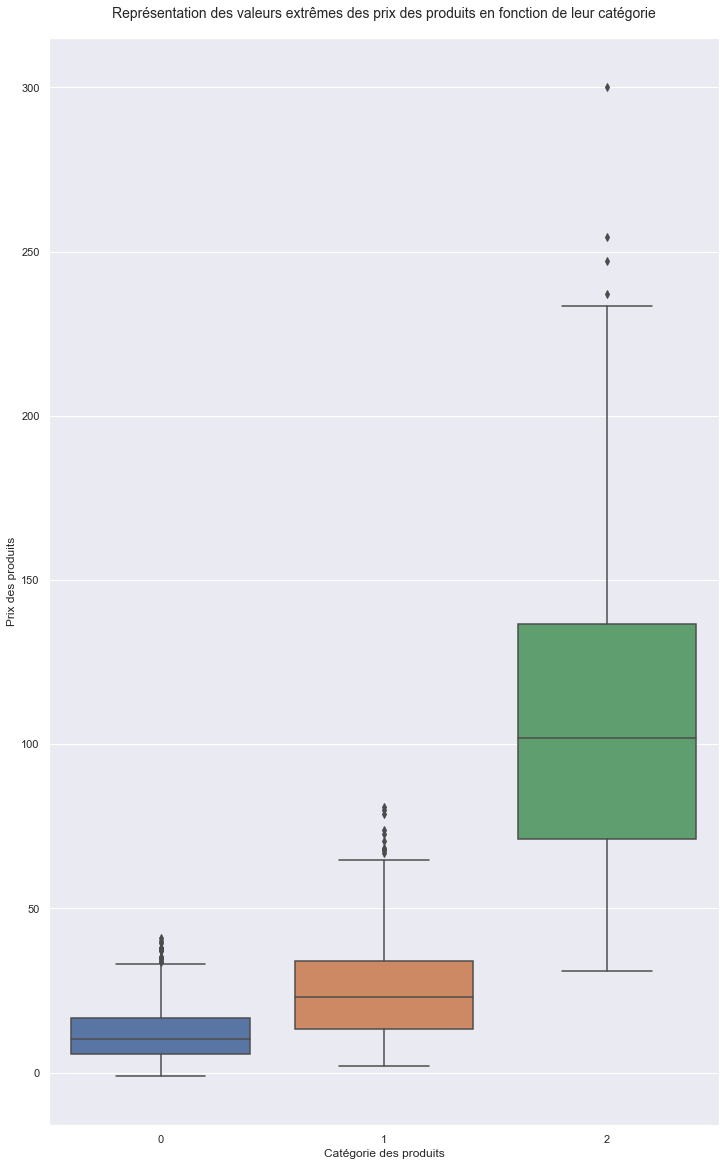

In [24]:
sns.set(rc={'figure.figsize':(12,20)})
# Permet de modifier la taille de la figure générée

sns.boxplot(data = produits, x = 'categ', y = 'price')
# Permet de générer la figure en fonction des variables fournies

plt.xlabel("Catégorie des produits") 
# Légende de l'axe x

plt.ylabel("Prix des produits")
# Légende de l'axe y

plt.title('Représentation des valeurs extrêmes des prix des produits en fonction de leur catégorie',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

En observant ce graphique, nous pouvons nous apercevoir que pour les produits des catégories 0 et 1, les valeurs aberrantes détectées se trouvent en continuité directe avec les autres valeurs de prix.

Nous comprenons également que les catégories des produits sont définis par les prix :
 - La catégorie 0 semble regrouper les produits avec un petit prix
 - La catégorie 1 semble regrouper les produits avec un prix plus important
 - Et enfin, la catégorie 2 semble regrouper les produits avec les prix les plus chers, comme les produits high-tech par exemple

En regardant les médianes des prix de chaque catégorie, cela semble être effectivement le cas.

In [25]:
np.median(produits.price[produits.categ == '0'])
# Donne la médiane d'une matrice

10.32

In [26]:
np.median(produits.price[produits.categ == '1'])

22.99

In [27]:
np.median(produits.price[produits.categ == '2'])

101.99

Cependant, tout ceci n'est que supposition puisqu'il nous manque les descriptifs pour chaque catégorie de produits. Il faudrait veiller à en fournir un pour rendre les résultats des futures analyses plus simple à expliquer.

## Transaction

In [28]:
transactions = pd.read_csv('transactions.csv')
transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


Cette table regroupe toutes les sessions d'achat des clients en donnant également les références des produits vendus lors de cette session, la date de la transaction ainsi que l'identifiant du client ayant effectué la transaction.

Comme cette table fournit un produit d'une session par ligne de données, nous ne pouvons pas vérifier l'unicité de la variable 'session_id' car il semble y avoir eu 342 316 transactions sur le site depuis son lancement mais nous avons une dataframe de 679 532 lignes.

Nous allons maintenant vérifier les valeurs disponibles pour la variable 'date' car nous nous retrouvons avec les données des tests du site.

In [29]:
np.sort(transactions.date.unique())

array(['2021-03-01 00:01:07.843138', '2021-03-01 00:02:26.047414',
       '2021-03-01 00:02:38.311413', ...,
       'test_2021-03-01 02:30:02.237448',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237450'], dtype=object)

In [30]:
df_test = transactions[transactions['date'].str.contains("test")]
df_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [31]:
df_test.client_id.unique()

array(['ct_0', 'ct_1'], dtype=object)

In [32]:
df_test.session_id.unique()

array(['s_0'], dtype=object)

In [33]:
df_test.id_prod.unique()

array(['T_0'], dtype=object)

Nous retrouvons l'identifiant T_0 vu dans la dataframe 'produits'.

In [34]:
test = transactions[transactions.id_prod == 'T_0']

In [35]:
perte = round((len(test)/len(transactions))*100,2)
print('En supprimant les données correspondant aux tests du site, nous perdrons',perte,'% des données totales de cette dataframe')

En supprimant les données correspondant aux tests du site, nous perdrons 0.03 % des données totales de cette dataframe


In [36]:
transactions = transactions[transactions.id_prod != 'T_0']
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


Nous allons également supprimer cet identifiant de la dataframe 'produits' puisque cela correspond aux tests du site. 

In [37]:
produits = produits[produits.id_prod != 'T_0']

Nous allons vérifier les valeurs nulles ainsi que les types des données des variables de la dataframe.

In [38]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [39]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Pour nos analyses, nous allons devoir changer le type de la variable 'date'.

In [40]:
transactions.date = pd.to_datetime(transactions.date).dt.normalize()
# Permet de changer le type de données de la variable fournie en datetime

In [41]:
transactions.dtypes
# Ici, cette commande est utilisée pour vérifier que le changement s'est correctement effectué

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [42]:
transactions.describe()

C:\Users\Elenweii\AppData\Local\Temp\ipykernel_12028\3177449877.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions.describe()


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,730,342315,8600
top,1_369,2021-09-30 00:00:00,s_118668,c_1609
freq,2252,1311,14,25488
first,NaN,2021-03-01 00:00:00,NaN,NaN
last,NaN,2023-02-28 00:00:00,NaN,NaN


In [43]:
transactions.duplicated().sum()

820

In [44]:
transactions = transactions.drop_duplicates()

Ici, nous pouvons voir que les dates de transactions s'étendent du 01 mars 2021 au 28 février 2023.

# Jointure

Nous allons dès à présent réaliser la jointure de nos trois tables.

In [45]:
ventes = transactions.merge(clients)
# Permet de joindre la première dataframe renseignée à la deuxième
# Puisqu'aucune condition n'est renseignée, cette commande va chercher une variable commune aux deux dataframes
# Puisque le type de jointure n'est pas renseigné, le type par défaut s'applique. Il s'agit de la jointure interne.

In [46]:
ventes = ventes.merge(produits)

In [47]:
ventes

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,f,1986,37,4.18,0
1,0_1518,2021-07-20,s_64849,c_103,f,1986,37,4.18,0
2,0_1518,2022-08-20,s_255965,c_103,f,1986,37,4.18,0
3,0_1518,2021-05-09,s_32104,c_6714,f,1968,55,4.18,0
4,0_1518,2022-05-30,s_216118,c_6714,f,1968,55,4.18,0
...,...,...,...,...,...,...,...,...,...
678286,1_408,2023-01-26,s_332548,c_7402,m,1945,78,35.24,1
678287,1_408,2022-11-26,s_302962,c_7402,m,1945,78,35.24,1
678288,1_408,2021-09-26,s_95708,c_7402,m,1945,78,35.24,1
678289,2_81,2022-02-19,s_167662,c_7616,m,1993,30,86.99,2


Nous obtenons cette dataframe. Or nous nous apercevons qu'il manque des lignes de données quand nous la comparons à la dataframe transaction. Nous allons tâcher de savoir pourquoi.

Nous constatons une perte de 221 lignes avec la jointure 'inner'.

In [48]:
ventes_produits_manquants = transactions.merge(clients)
ventes_produits_manquants = ventes_produits_manquants.merge(produits, how = 'outer')
ventes_produits_manquants.isnull().sum()

id_prod         0
date           21
session_id     21
client_id      21
sex            21
birth          21
age            21
price         221
categ         221
dtype: int64

Avec la jointure 'outer' seule la variable id_prod est sans valeur nulle.

Nous avons donc des produits dont le prix n'est pas renseigné.

In [49]:
non_listes = ventes_produits_manquants[ventes_produits_manquants.price.isnull()]
non_listes.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
age             0
price         221
categ         221
dtype: int64

In [50]:
non_listes.id_prod.unique()

array(['0_2245'], dtype=object)

Un seul produit est concerné.

In [51]:
perte = round((len(non_listes)/len(ventes_produits_manquants))*100,2)
print('En ne conservant pas les données correspondant au produit sans prix, nous perdrons',perte,'% des données totales de cette dataframe')

En ne conservant pas les données correspondant au produit sans prix, nous perdrons 0.03 % des données totales de cette dataframe


les 21 lignes restantes sont des produits proposés mais non achetés. Nous allons donc les mettre dans une nouvelle dataframe afin de conserver la jointure comme une dataframe regroupant uniquement les produits vendus.

Nous allons donc conserver la dataframe obtenue avec les jointures internes.

Pour rendre certaines de nos analyses plus clair, nous allons créer deux nouvelles colonnes pour regrouper les clients en fonction de leur tranche d'âge et pour regrouper les transactions en fonction de leur mois et année de vente.

In [52]:
ventes = ventes.assign(ages_range = 0)

In [53]:
ventes.loc[ventes.birth>2002,'ages_range']= '-20'
# Permet d'assigner une valeur à la variable renseignée quand les conditions sont respectées

ventes.loc[(ventes.birth>=1993)&(ventes.birth<=2002),'ages_range']= '20-29'
ventes.loc[(ventes.birth>=1983)&(ventes.birth<=1992),'ages_range']= '30-39'
ventes.loc[(ventes.birth>=1973)&(ventes.birth<=1982),'ages_range']= '40-49'
ventes.loc[(ventes.birth>=1963)&(ventes.birth<=1972),'ages_range']= '50-59'
ventes.loc[(ventes.birth>=1953)&(ventes.birth<=1962),'ages_range']= '60-69'
ventes.loc[(ventes.birth>=1943)&(ventes.birth<=1952),'ages_range']= '70-79'
ventes.loc[ventes.birth<=1942,'ages_range']= '80+'
ventes.loc[ventes.birth.isnull(), 'ages_range']= np.nan

In [54]:
ventes['year'] = ventes.date.dt.year 
# Permet d'extraire l'année d'une date et de l'enregistrer dans une nouvelle colonne

ventes['month'] = ventes.date.dt.month

In [55]:
ventes = ventes.assign(period = 0)

In [56]:
ventes.loc[(ventes.year == 2021)&(ventes.month == 3),'period']= 'mar 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 4),'period']= 'avr 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 5),'period']= 'may 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 6),'period']= 'jun 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 7),'period']= 'jul 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 8),'period']= 'aug 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 9),'period']= 'sep 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 10),'period']= 'oct 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 11),'period']= 'nov 2021'
ventes.loc[(ventes.year == 2021)&(ventes.month == 12),'period']= 'dec 2021'
ventes.loc[(ventes.year == 2022)&(ventes.month == 1),'period']= 'jan 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 2),'period']= 'feb 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 3),'period']= 'mar 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 4),'period']= 'avr 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 5),'period']= 'may 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 6),'period']= 'jun 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 7),'period']= 'jul 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 8),'period']= 'aug 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 9),'period']= 'sep 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 10),'period']= 'oct 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 11),'period']= 'nov 2022'
ventes.loc[(ventes.year == 2022)&(ventes.month == 12),'period']= 'dec 2022'
ventes.loc[(ventes.year == 2023)&(ventes.month == 1),'period']= 'jan 2023'
ventes.loc[(ventes.year == 2023)&(ventes.month == 2),'period']= 'feb 2023'
ventes.loc[(ventes.year.isnull())&(ventes.month.isnull()), 'period']= np.nan

In [57]:
ventes = ventes.sort_values(by=['date','period'])
# Permet de trier les lignes de la dataframe en fonction des variables renseignées

ventes

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,ages_range,year,month,period
518,0_1518,2021-03-01,s_476,c_6568,m,1978,45,4.18,0,40-49,2021,3,mar 2021
1228,0_1627,2021-03-01,s_72,c_6823,m,1958,65,3.99,0,60-69,2021,3,mar 2021
1347,0_1627,2021-03-01,s_209,c_8083,m,1956,67,3.99,0,60-69,2021,3,mar 2021
1543,0_1104,2021-03-01,s_236,c_2849,m,1989,34,13.21,0,30-39,2021,3,mar 2021
2267,0_1390,2021-03-01,s_2,c_664,m,1960,63,19.37,0,60-69,2021,3,mar 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673716,0_1705,2023-02-28,s_348001,c_4561,f,1974,49,22.99,0,40-49,2023,2,feb 2023
674960,1_427,2023-02-28,s_348339,c_6464,m,2004,19,32.99,1,-20,2023,2,feb 2023
675179,1_463,2023-02-28,s_348033,c_945,m,1998,25,36.99,1,20-29,2023,2,feb 2023
677115,1_324,2023-02-28,s_348079,c_4323,f,1983,40,31.97,1,30-39,2023,2,feb 2023


In [58]:
ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
price         0
categ         0
ages_range    0
year          0
month         0
period        0
dtype: int64

# Création de tables pour les analyses

Grâce à cette dataframe issue des jointures, nous pouvons maintenant créer de petites dataframes qui seront utiles pour nos analyses.

## Depenses clients

La première dataframe créée regroupera les dépenses totales de chaque client.

In [59]:
depenses = ventes[ventes.session_id.notnull()]
depenses = depenses.loc[:,['client_id','price']]
depenses = depenses.groupby('client_id').sum()
depenses = depenses.sort_values(by='price')
depenses = depenses.reset_index()
depenses

,client_id,price
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_240,11.06
4,c_4648,11.20
...,...,...
8595,c_3263,5276.87
8596,c_3454,113637.93
8597,c_6714,153370.60
8598,c_4958,288600.82


Nous nous apercevons rapidement que quatre des clients du site ont des dépenses extrêmement élevées comparé aux autres clients.
Il s'agit très certainement de clients professionnels.

Pour rendre nos analyses plus pertinentes, nous allons créer des tables pour les clients particuliers et des tables pour les clients professionnels.

### Professionnels

In [60]:
pro = ['c_3454','c_6714','c_4958','c_1609']
# Création d'une liste regroupant les identifiants des clients professionnels pour les dataframes

In [61]:
depenses_pro = depenses[depenses.client_id.isin(pro)]
depenses_pro

,client_id,price
8596,c_3454,113637.93
8597,c_6714,153370.60
8598,c_4958,288600.82
8599,c_1609,323678.54


### Particuliers

In [62]:
depenses_par = depenses.drop(depenses_pro.index)
depenses_par

,client_id,price
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_240,11.06
4,c_4648,11.20
...,...,...
8591,c_7319,5155.77
8592,c_2140,5208.82
8593,c_2899,5214.05
8594,c_1570,5271.62


## Ventes

Nous allons également créer des dataframes regroupant les ventes des particuliers et des professionnels.

### Professionnels

In [63]:
ventes_pro = ventes[ventes.client_id.isin(pro)]
ventes_pro

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,ages_range,year,month,period
3387,0_1159,2021-03-01,s_7,c_1609,m,1980,43,7.99,0,40-49,2021,3,mar 2021
30803,0_1543,2021-03-01,s_145,c_6714,f,1968,55,13.99,0,50-59,2021,3,mar 2021
31581,1_376,2021-03-01,s_89,c_3454,m,1969,54,17.49,1,50-59,2021,3,mar 2021
45881,0_1020,2021-03-01,s_359,c_6714,f,1968,55,9.71,0,50-59,2021,3,mar 2021
65410,0_1410,2021-03-01,s_145,c_6714,f,1968,55,14.85,0,50-59,2021,3,mar 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623078,1_317,2023-02-28,s_348280,c_4958,m,1999,24,38.99,1,20-29,2023,2,feb 2023
649303,0_1812,2023-02-28,s_348348,c_1609,m,1980,43,7.51,0,40-49,2023,2,feb 2023
661853,1_1,2023-02-28,s_348182,c_1609,m,1980,43,42.99,1,40-49,2023,2,feb 2023
667774,0_842,2023-02-28,s_347978,c_3454,m,1969,54,3.07,0,50-59,2023,2,feb 2023


### Particuliers

In [64]:
ventes_par = ventes.drop(ventes_pro.index)
ventes_par

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,ages_range,year,month,period
518,0_1518,2021-03-01,s_476,c_6568,m,1978,45,4.18,0,40-49,2021,3,mar 2021
1228,0_1627,2021-03-01,s_72,c_6823,m,1958,65,3.99,0,60-69,2021,3,mar 2021
1347,0_1627,2021-03-01,s_209,c_8083,m,1956,67,3.99,0,60-69,2021,3,mar 2021
1543,0_1104,2021-03-01,s_236,c_2849,m,1989,34,13.21,0,30-39,2021,3,mar 2021
2267,0_1390,2021-03-01,s_2,c_664,m,1960,63,19.37,0,60-69,2021,3,mar 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673716,0_1705,2023-02-28,s_348001,c_4561,f,1974,49,22.99,0,40-49,2023,2,feb 2023
674960,1_427,2023-02-28,s_348339,c_6464,m,2004,19,32.99,1,-20,2023,2,feb 2023
675179,1_463,2023-02-28,s_348033,c_945,m,1998,25,36.99,1,20-29,2023,2,feb 2023
677115,1_324,2023-02-28,s_348079,c_4323,f,1983,40,31.97,1,30-39,2023,2,feb 2023


## Chiffres d'affaires par jour

Cette table contiendra les chiffres d'affaires réalisés par le site par jour.

In [65]:
sales = ventes.loc[:,['date','price']]

In [66]:
sales = sales.groupby('date').sum()
sales = sales.reset_index()
sales

,date,price
0,2021-03-01,16565.22
1,2021-03-02,15462.47
2,2021-03-03,15165.14
3,2021-03-04,15191.18
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15186.90
726,2023-02-25,15728.70
727,2023-02-26,16290.95
728,2023-02-27,19101.49


## Produits invendus

Dans cette dataframe, nous allons lister les produits ne s'étant pas vendu sur le site, leur prix, ainsi que leur catégorie.

In [67]:
no_sales = ventes_produits_manquants[ventes_produits_manquants.id_prod != '0_2245']
no_sales = no_sales[no_sales.date.isnull()]
no_sales = no_sales.loc[:,['id_prod','price','categ']]
no_sales

,id_prod,price,categ
678512,0_1016,35.06,0
678513,0_1780,1.67,0
678514,0_1062,20.08,0
678515,0_1119,2.99,0
678516,0_1014,1.15,0
678517,1_0,31.82,1
678518,0_1318,20.92,0
678519,0_1800,22.05,0
678520,0_1645,2.99,0
678521,0_322,2.99,0


## Produits vendus

Ici, nous regrouperons le nombre de produits vendus pour chaque référence.

### Tout client confondus

In [68]:
nb_sales = ventes[ventes.session_id.notnull()]
nb_sales['sales'] = nb_sales['id_prod'].map(nb_sales['id_prod'].value_counts())
nb_sales = nb_sales.loc[:,['id_prod','categ','sales']]
nb_sales = nb_sales.drop_duplicates()
nb_sales = nb_sales.sort_values(by = 'sales',ascending =False)
nb_sales

,id_prod,categ,sales
229489,1_369,1,2245
125039,1_417,1,2183
199907,1_414,1,2178
73478,1_498,1,2122
232755,1_425,1,2095
...,...,...,...
672305,0_1539,0,1
677673,0_541,0,1
677152,0_2201,0,1
669565,0_1379,0,1


### Chez les professionnels

In [69]:
nb_sales_pro = ventes[ventes.session_id.notnull()]
nb_sales_pro = nb_sales_pro[nb_sales_pro.client_id.isin(pro)]
nb_sales_pro['sales'] = nb_sales_pro['id_prod'].map(nb_sales_pro['id_prod'].value_counts())
nb_sales_pro = nb_sales_pro.loc[:,['id_prod','categ','sales']]
nb_sales_pro = nb_sales_pro.drop_duplicates()
nb_sales_pro = nb_sales_pro.sort_values(by = 'sales',ascending =False)
nb_sales_pro

,id_prod,categ,sales
160342,1_403,1,163
72001,1_498,1,157
190901,1_395,1,152
125039,1_417,1,141
129739,1_400,1,141
...,...,...,...
663559,0_534,0,1
618900,1_69,1,1
654485,1_18,1,1
591812,1_298,1,1


### Chez les particuliers

In [70]:
nb_sales_par = ventes[ventes.session_id.notnull()]
nb_sales_par = nb_sales_par[nb_sales_par.client_id != 'c_3454']
nb_sales_par = nb_sales_par[nb_sales_par.client_id != 'c_6714']
nb_sales_par = nb_sales_par[nb_sales_par.client_id != 'c_4958']
nb_sales_par = nb_sales_par[nb_sales_par.client_id != 'c_1609']
nb_sales_par['sales'] = nb_sales_par['id_prod'].map(nb_sales_par['id_prod'].value_counts())
nb_sales_par = nb_sales_par.loc[:,['id_prod','categ','sales']]
nb_sales_par = nb_sales_par.drop_duplicates()
nb_sales_par = nb_sales_par.sort_values(by = 'sales',ascending =False)
nb_sales_par

,id_prod,categ,sales
229489,1_369,1,2112
199907,1_414,1,2046
125318,1_417,1,2042
73478,1_498,1,1965
232755,1_425,1,1961
...,...,...,...
669565,0_1379,0,1
650061,1_514,1,1
667613,0_1726,0,1
663705,0_1820,0,1


## Paniers clients

Dans cette dataframe, nous regrouperons les achats par session 

In [71]:
panier_1 = ventes[ventes.session_id.notnull()]
panier_1 = panier_1.loc[:,['session_id','client_id','date','id_prod','sex','ages_range','age']]
panier_1['nb_product_sales'] = panier_1['session_id'].map(panier_1['session_id'].value_counts())
panier_1 = panier_1.drop(columns = 'id_prod')
panier_1 = panier_1.drop_duplicates(subset =['session_id','nb_product_sales'])
panier_1

,session_id,client_id,date,sex,ages_range,age,nb_product_sales
518,s_476,c_6568,2021-03-01,m,40-49,45,3
1228,s_72,c_6823,2021-03-01,m,60-69,65,1
1347,s_209,c_8083,2021-03-01,m,60-69,67,4
1543,s_236,c_2849,2021-03-01,m,30-39,34,4
2267,s_2,c_664,2021-03-01,m,60-69,63,1
...,...,...,...,...,...,...,...
667518,s_348205,c_4446,2023-02-28,f,60-69,67,1
667680,s_348044,c_938,2023-02-28,m,50-59,56,1
667774,s_347978,c_3454,2023-02-28,m,50-59,54,1
668206,s_347996,c_3454,2023-02-28,m,50-59,54,1


In [72]:
panier_2 = ventes[ventes.session_id.notnull()]
panier_2 = panier_2.loc[:,['session_id','price']]
panier_2 = panier_2.groupby('session_id').sum()
panier_2 = panier_2.reset_index()
panier_2 = panier_2.drop_duplicates()
panier_2 = panier_2.rename(columns = {'price':'total_amount'})
panier_2

,session_id,total_amount
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49
...,...,...
342270,s_99994,28.92
342271,s_99995,19.84
342272,s_99996,56.27
342273,s_99997,6.99


In [73]:
panier = panier_1.merge(panier_2, how ='inner')
panier

,session_id,client_id,date,sex,ages_range,age,nb_product_sales,total_amount
0,s_476,c_6568,2021-03-01,m,40-49,45,3,29.32
1,s_72,c_6823,2021-03-01,m,60-69,65,1,3.99
2,s_209,c_8083,2021-03-01,m,60-69,67,4,35.96
3,s_236,c_2849,2021-03-01,m,30-39,34,4,62.05
4,s_2,c_664,2021-03-01,m,60-69,63,1,19.37
...,...,...,...,...,...,...,...,...
342270,s_348205,c_4446,2023-02-28,f,60-69,67,1,14.99
342271,s_348044,c_938,2023-02-28,m,50-59,56,1,2.24
342272,s_347978,c_3454,2023-02-28,m,50-59,54,1,3.07
342273,s_347996,c_3454,2023-02-28,m,50-59,54,1,7.99


### Chez les professionnels

In [74]:
panier_pro = panier[panier.client_id.isin(pro)]
panier_pro

,session_id,client_id,date,sex,ages_range,age,nb_product_sales,total_amount
7,s_7,c_1609,2021-03-01,m,40-49,43,2,13.85
47,s_145,c_6714,2021-03-01,f,50-59,55,5,59.82
48,s_89,c_3454,2021-03-01,m,50-59,54,1,17.49
60,s_359,c_6714,2021-03-01,f,50-59,55,4,38.50
105,s_33,c_3454,2021-03-01,m,50-59,54,1,10.99
...,...,...,...,...,...,...,...,...
342213,s_348390,c_3454,2023-02-28,m,50-59,54,1,14.53
342252,s_348351,c_4958,2023-02-28,m,20-29,24,1,67.99
342269,s_348182,c_1609,2023-02-28,m,40-49,43,1,42.99
342272,s_347978,c_3454,2023-02-28,m,50-59,54,1,3.07


### Chez les particuliers

In [75]:
panier_par = panier.drop(panier_pro.index)
panier_par

,session_id,client_id,date,sex,ages_range,age,nb_product_sales,total_amount
0,s_476,c_6568,2021-03-01,m,40-49,45,3,29.32
1,s_72,c_6823,2021-03-01,m,60-69,65,1,3.99
2,s_209,c_8083,2021-03-01,m,60-69,67,4,35.96
3,s_236,c_2849,2021-03-01,m,30-39,34,4,62.05
4,s_2,c_664,2021-03-01,m,60-69,63,1,19.37
...,...,...,...,...,...,...,...,...
342267,s_348412,c_6642,2023-02-28,m,50-59,59,1,10.99
342268,s_348088,c_5738,2023-02-28,m,40-49,47,1,53.99
342270,s_348205,c_4446,2023-02-28,f,60-69,67,1,14.99
342271,s_348044,c_938,2023-02-28,m,50-59,56,1,2.24


## Fréquences d'achat

Dans cette dataframe, nous allons regrouper le nombre de fois où les clients ont réalisé un achat sur le site depuis son lancement, autrement dit leur fréquence d'achat sur deux ans.

In [76]:
freq = panier.loc[:,['client_id','ages_range','age']]
freq

,client_id,ages_range,age
0,c_6568,40-49,45
1,c_6823,60-69,65
2,c_8083,60-69,67
3,c_2849,30-39,34
4,c_664,60-69,63
...,...,...,...
342270,c_4446,60-69,67
342271,c_938,50-59,56
342272,c_3454,50-59,54
342273,c_3454,50-59,54


In [77]:
freq['frq_sales'] = freq['client_id'].map(freq['client_id'].value_counts())
freq

,client_id,ages_range,age,frq_sales
0,c_6568,40-49,45,15
1,c_6823,60-69,65,63
2,c_8083,60-69,67,10
3,c_2849,30-39,34,50
4,c_664,60-69,63,104
...,...,...,...,...
342270,c_4446,60-69,67,49
342271,c_938,50-59,56,102
342272,c_3454,50-59,54,5570
342273,c_3454,50-59,54,5570


In [78]:
freq = freq.drop_duplicates()
freq

,client_id,ages_range,age,frq_sales
0,c_6568,40-49,45,15
1,c_6823,60-69,65,63
2,c_8083,60-69,67,10
3,c_2849,30-39,34,50
4,c_664,60-69,63,104
...,...,...,...,...
156625,c_3058,60-69,64,5
161222,c_224,20-29,27,4
162057,c_2566,50-59,52,3
163395,c_2269,20-29,25,2


### Chez les professionnels

In [79]:
freq_pro = freq[freq.client_id.isin(pro)]
freq_pro

,client_id,ages_range,age,frq_sales
7,c_1609,40-49,43,10997
47,c_6714,50-59,55,2620
48,c_3454,50-59,54,5570
146,c_4958,20-29,24,3851


### Chez les particuliers

In [80]:
freq_par = freq.drop(freq_pro.index)
freq_par

,client_id,ages_range,age,frq_sales
0,c_6568,40-49,45,15
1,c_6823,60-69,65,63
2,c_8083,60-69,67,10
3,c_2849,30-39,34,50
4,c_664,60-69,63,104
...,...,...,...,...
156625,c_3058,60-69,64,5
161222,c_224,20-29,27,4
162057,c_2566,50-59,52,3
163395,c_2269,20-29,25,2


## Chiffre d'affaires par categorie

In [81]:
CA_categ = ventes.loc[:,['categ','price']]
CA_categ = CA_categ.groupby('categ').sum()
CA_categ = CA_categ.reset_index()
CA_categ

,categ,price
0,0,4414777.47
1,1,4648137.82
2,2,2773683.38


Ceci conclut la création de nos tables nécessaires. Nous pouvons désormais passer aux analyses demandées. 

# Analyses pour Antoine

Suite au mail d'Antoine transmis par Annabelle, celui-ci souhaite :
- différents indicateurs et graphiques autour du chiffre d'affaires
- l'évolution dans le temps du chiffre d'affaires
- une décomposition en moyenne mobile pour évaluer la tendance globale
- les tops et les flops des ventes
- la répartition des produits vendus suivant leur catégorie
- connaître des informations sur nos clients
- la répartition du chiffre d'affaires entre nos clients

## Chiffre d'affaires

Nous allons commencer par calculer des informations de base sur le chiffre d'affaires à savoir son montant total et son montant par rapport à la catégorie de nos clients puis par rapport à la catégorie de nos produits.  

In [82]:
CA = round(ventes.price[ventes.session_id.notnull()].sum(),2)
print('Le chiffre d\'affaire des ventes de livres sur la boutique en ligne depuis son lancement est de', CA, '€.' )

Le chiffre d'affaire des ventes de livres sur la boutique en ligne depuis son lancement est de 11836598.67 €.


### Chiffre d'affaires entre les différents types de clients

In [83]:
CA_pro = round(depenses_pro.price.sum(),2)
print('Le chiffre d\'affaire enregistré pour les ventes aux professionnels est de', CA_pro,'€')

Le chiffre d'affaire enregistré pour les ventes aux professionnels est de 879287.89 €


In [84]:
CA_par = round(depenses_par.price.sum(),2)
print('Le chiffre d\'affaire enregistré pour les ventes aux particuliers est de', CA_par,'€')

Le chiffre d'affaire enregistré pour les ventes aux particuliers est de 10957310.78 €


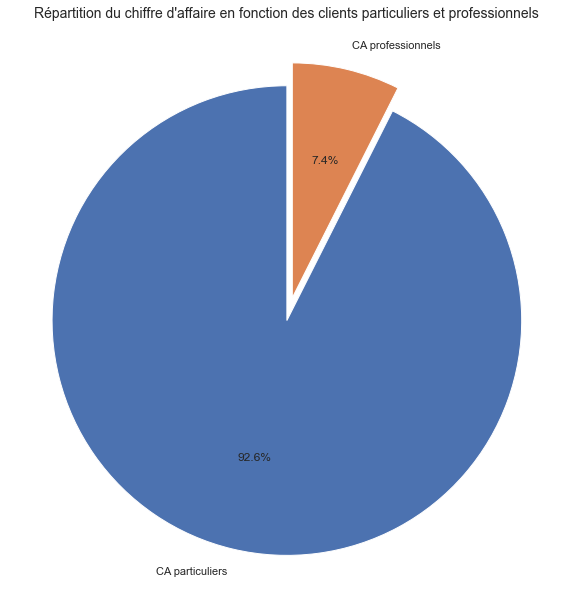

In [85]:
labels = 'CA particuliers', 'CA professionnels'
# Etiquettes des différentes parts de notre graphique

sizes = [CA_par,CA_pro]
# Tailles de chaque part de notre graphique

explode = (0.1,0)
# Permet de sortir la part qui nous intérresse du reste du graphique

plt.figure(figsize = (10,10))
# Taille du graphique

plt.pie(sizes, labels=labels, explode = explode,
        autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition du chiffre d\'affaire en fonction des clients particuliers et professionnels', fontsize = 14, pad = 20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.show()

La part majoritaire du chiffre d'affaires vient de nos clients particuliers qui nous ont fournis 92,6% du chiffre d'affaires total du site.

### Chiffre d'affaires suivant les catégories de nos produits

In [86]:
CA_categ_0 = round(CA_categ[CA_categ.categ == '0'].price.sum(),2)
print('Le chiffre d\'affaire enregistré pour les ventes de produits de catégorie 0 est de', CA_categ_0,'€')

Le chiffre d'affaire enregistré pour les ventes de produits de catégorie 0 est de 4414777.47 €


In [87]:
CA_categ_1 = round(CA_categ[CA_categ.categ == '1'].price.sum(),2)
print('Le chiffre d\'affaire enregistré pour les ventes de produits de catégorie 1 est de', CA_categ_1,'€')

Le chiffre d'affaire enregistré pour les ventes de produits de catégorie 1 est de 4648137.82 €


In [88]:
CA_categ_2 = round(CA_categ[CA_categ.categ == '2'].price.sum(),2)
print('Le chiffre d\'affaire enregistré pour les ventes de produits de catégorie 2 est de', CA_categ_2,'€')

Le chiffre d'affaire enregistré pour les ventes de produits de catégorie 2 est de 2773683.38 €


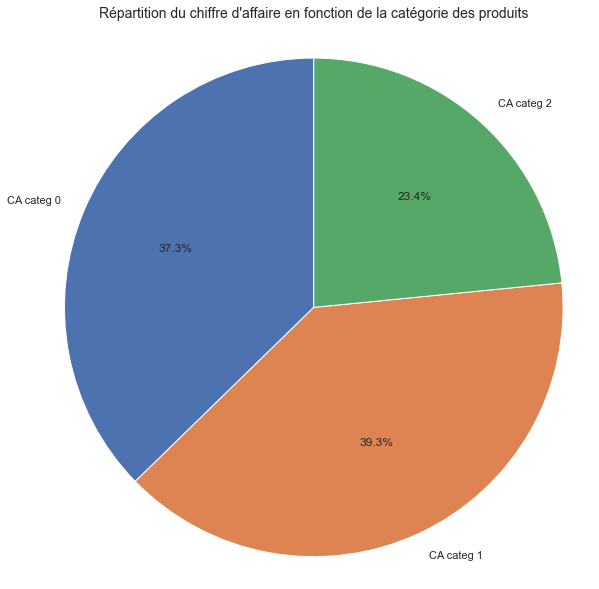

In [89]:
labels = 'CA categ 0', 'CA categ 1', 'CA categ 2'
# Etiquettes des différentes parts de notre graphique

sizes = [CA_categ_0, CA_categ_1, CA_categ_2]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (10,10))
# Taille du graphique

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition du chiffre d\'affaire en fonction de la catégorie des produits', fontsize = 14, pad = 20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.show()

Nous pouvons observer ici que les parts du CA des catégories 0 et 1 est presque la même et que la part de la catégorie 2 représente moins de 25% du CA sur le site.

### Répartition suivant différents indicateurs

#### Répartition en fonction du genre des clients ainsi que des catégories des produits

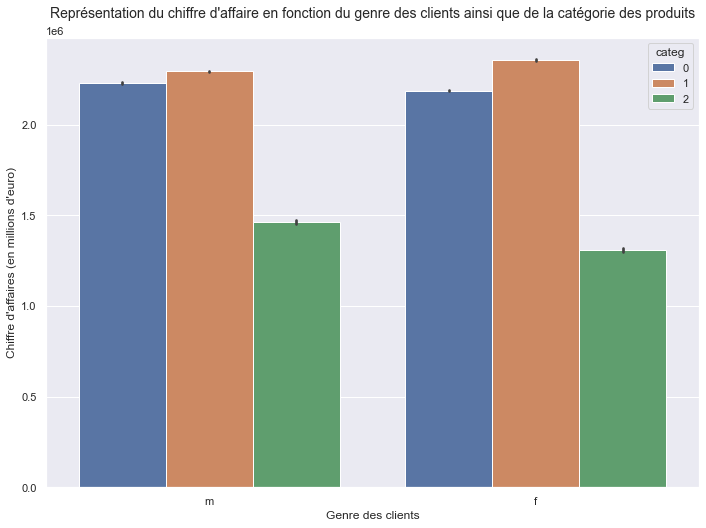

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = ventes, x = ventes.sex, y = ventes.price, hue =ventes.categ, estimator = sum )

plt.xlabel("Genre des clients") 
# Légende de l'axe x

plt.ylabel("Chiffre d'affaires (en millions d'euro)")
# Légende de l'axe y

plt.title('Représentation du chiffre d\'affaire en fonction du genre des clients ainsi que de la catégorie des produits',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Ici, nous ne constatons aucune différence entre les hommes et les femmes en ce qui concerne leur dépense ainsi que la catégorie de produits qu'ils achètent.

#### Répartition en fonction de la trache d'âge des clients et des catégories de produits

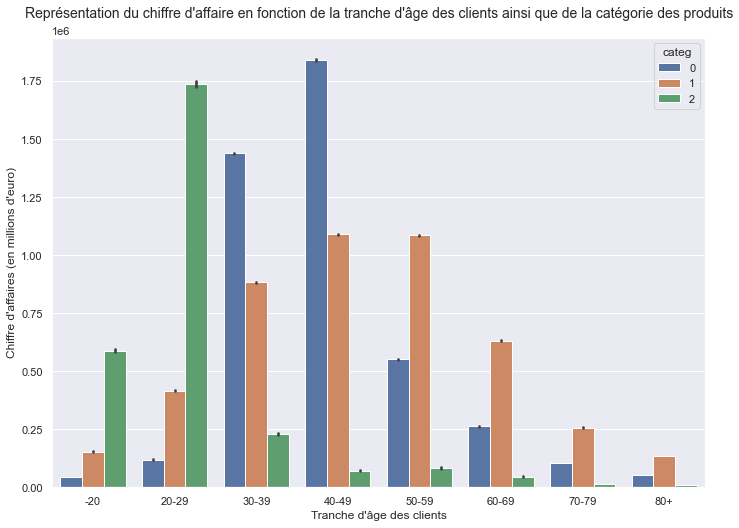

In [91]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = ventes,
            x = ventes.ages_range, 
            y = ventes.price, 
            hue = ventes.categ,
            order = ['-20','20-29','30-39','40-49','50-59','60-69','70-79','80+'],
            estimator = sum)
plt.xlabel("Tranche d'âge des clients") 
# Légende de l'axe x

plt.ylabel("Chiffre d'affaires (en millions d'euro)")
# Légende de l'axe y

plt.title('Représentation du chiffre d\'affaire en fonction de la tranche d\'âge des clients ainsi que de la catégorie des produits',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Ici en revanche, nous voyons des différences notables comme la tranche 20-29 ans achète bien plus de produits de la catégorie 2 que des produits d'autres catégories.

En utilisant nos suppositions précédentes, nous pouvons imaginer aisément que cela peut représenter des étudiants ayant besoin de matériels spécifiques (pourquoi pas informatiques comme des tablettes de lectures) pour leurs cours tandis que la tranche des 30-39 et celle des 40-49 représentent plutôt des salariés et/ou parents qui ont besoin de fourniture de bureau comme les cahiers et crayons pour leur travail ou pour leurs enfants.

## Évolution dans le temps du chiffre d'affaires

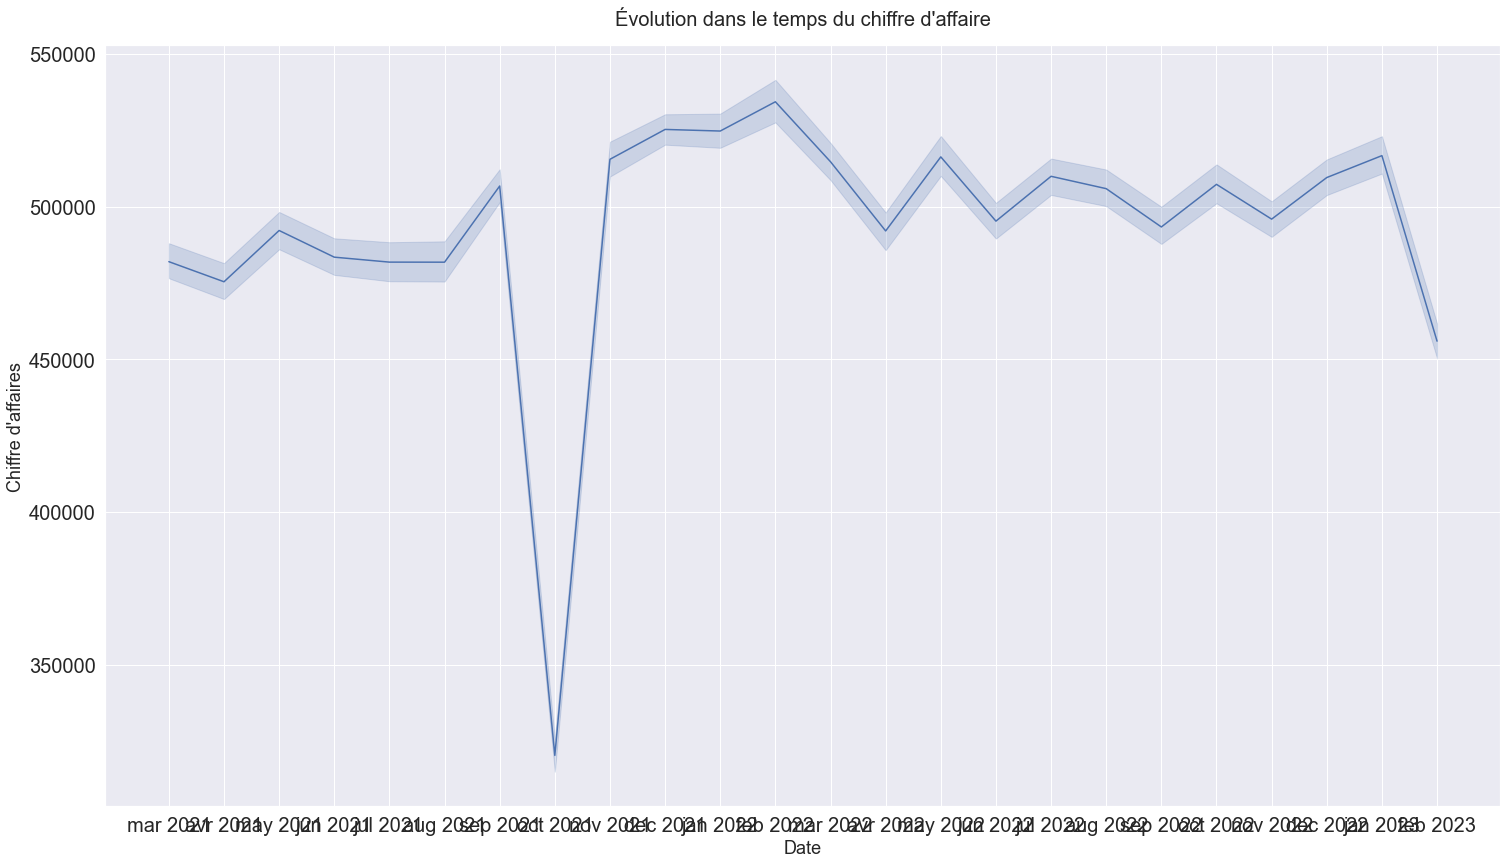

In [92]:
sns.set(rc={'figure.figsize':(25,14)})
sns.lineplot(data = ventes, 
             x = 'period', 
             y = 'price', 
            estimator= 'sum')
plt.xlabel("Date", size = 18) 
# Légende de l'axe x

plt.ylabel("Chiffre d'affaires", size =18)
# Légende de l'axe y

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Évolution dans le temps du chiffre d\'affaire',fontsize = 20, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

De mars 2021 à septembre de la même année, le CA est passé de 485 000€ à 510 000€.

Nous constatons une baisse extrême du CA au cours du mois d'octobre 2021 à moins de 320 000€ avant de remonter et d'être entre 535 000€ et 490 000€ de novembre 2021 à janvier 2023.

Nous constatons une nouvelle baisse en février 2023 avec un CA de 455 000€.

Nous allons regarder plus en détail cette évolution en fonction des catégories des produits.

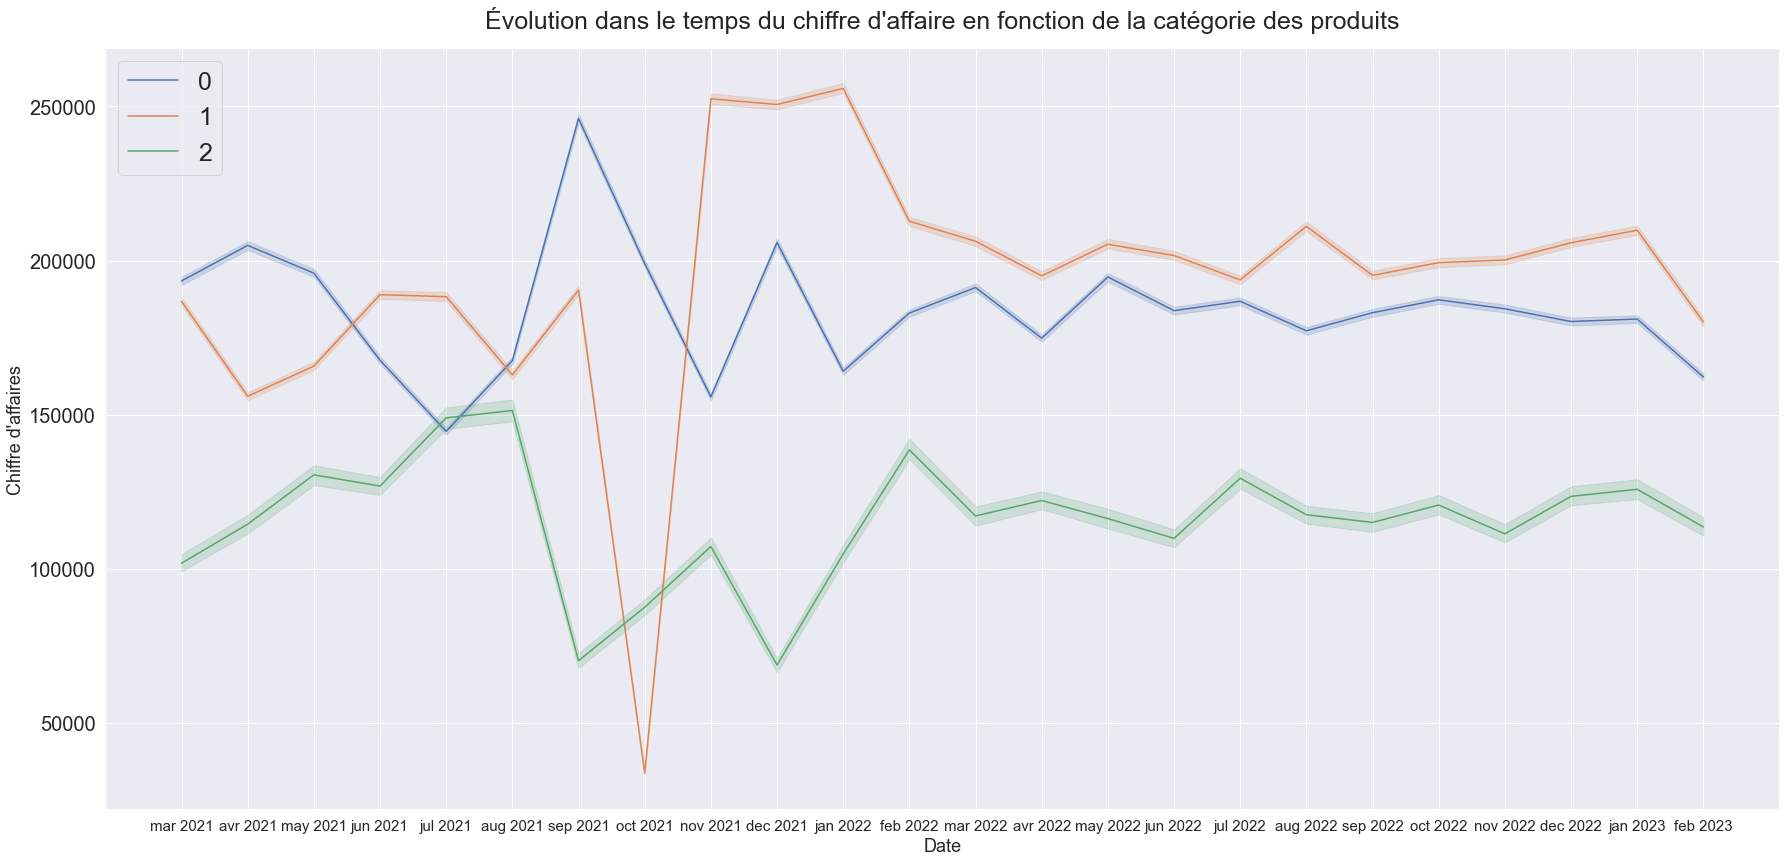

In [93]:
sns.set(rc={'figure.figsize':(30,14)})
sns.lineplot(data = ventes, 
             x = 'period', 
             y = 'price', 
             hue = 'categ',
            estimator= 'sum')

plt.legend(loc=2, prop={'size': 25})
# Permet d'augmenter la taille de la légende

plt.xlabel("Date", size=18) 
# Légende de l'axe x

plt.ylabel("Chiffre d'affaires",size = 18)
# Légende de l'axe y

plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.title('Évolution dans le temps du chiffre d\'affaire en fonction de la catégorie des produits',fontsize =25, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Nous constatons que la baisse enregistrée se situe au niveau des produits de la catégorie 1.

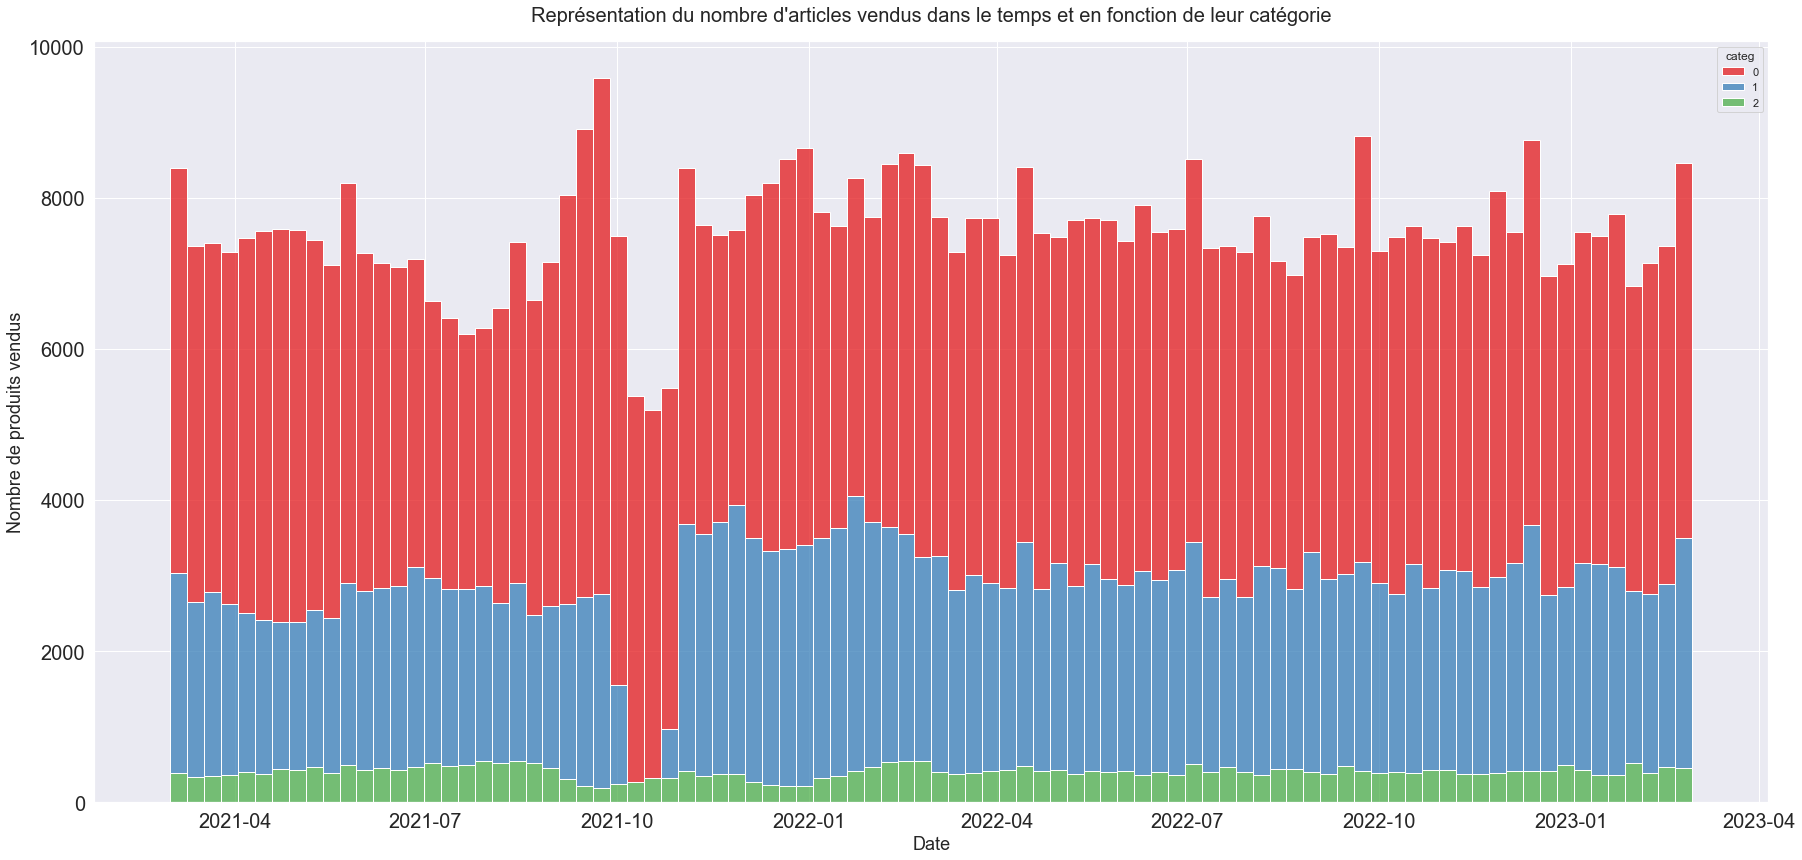

In [94]:
sns.histplot(data = ventes, x = 'date', hue ='categ', palette = 'Set1',multiple="stack")
plt.xlabel("Date",size = 18) 
# Légende de l'axe x

plt.ylabel("Nombre de produits vendus",size =18)
# Légende de l'axe y

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Représentation du nombre d\'articles vendus dans le temps et en fonction de leur catégorie',fontsize = 20, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Grâce à ce dernier graphique, nous pouvons voir que pour certaines dates du mois d'octobre 2021, aucun article de la catégorie 1 n'a été vendu.

Cela peut être dû à un problème d'approvisionnement des stocks du site qui a rendu impossible l'achat de ces articles.

## Analyse de la tendance

In [95]:
sales['1month_rolling_avg'] = sales.price.rolling(31).mean()

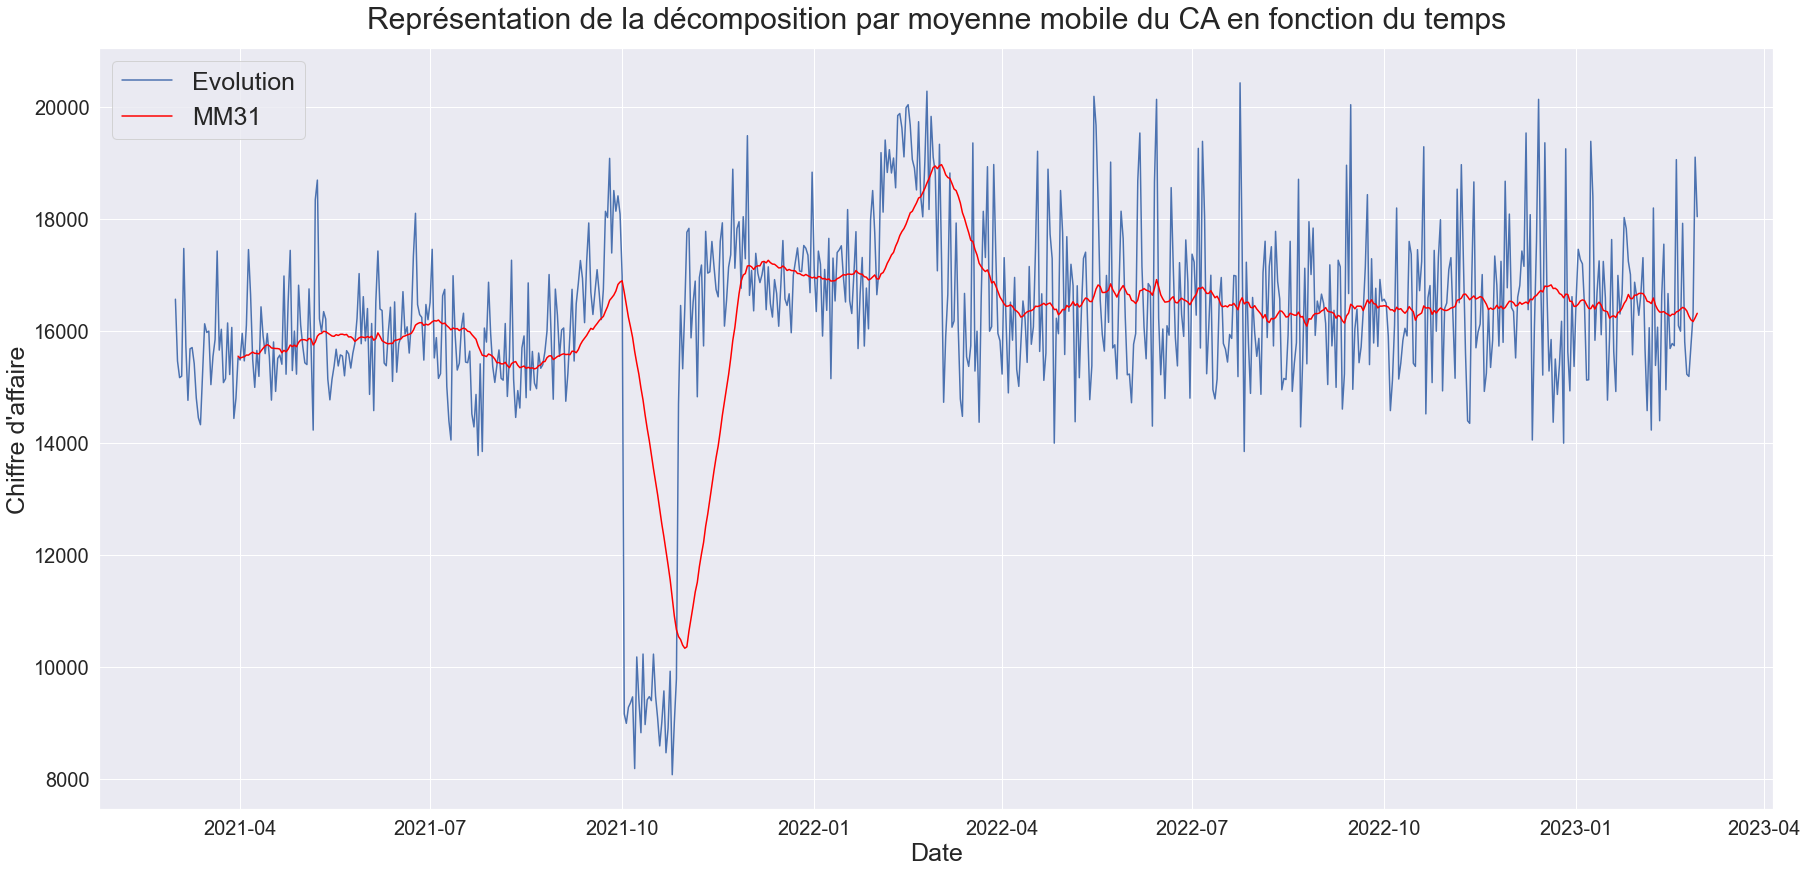

In [96]:
sns.set(rc={'figure.figsize':(30,14)})
sns.lineplot(data = sales, 
             x = 'date', 
             y = 'price', 
             legend= 'brief',
            label='Evolution')
sns.lineplot(data = sales,
            x = 'date',
            y = '1month_rolling_avg',
            color = 'red',
            legend='brief',
            label = 'MM31')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=2, prop={'size': 25})
# Permet d'augmenter la taille de la légende

plt.xlabel("Date", size = 25) 
# Légende de l'axe x

plt.ylabel("Chiffre d'affaire",size= 25)
# Légende de l'axe y

plt.title('Représentation de la décomposition par moyenne mobile du CA en fonction du temps',fontsize = 30, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Grâce à la décomposition en moyenne mobile, nous pouvons observer la tendance globale de l'évolution du CA.

Les points les plus marquants de ce graphique sont :
- la forte tendance en baisse enregistrée entre octobre et novembre suivi juste après d'une forte tendance en hausse
- la tendance en hausse entre février 2022 et mars 2022 suivi d'une tendance en baisse entre mars et avril 2022

## Produits les mieux vendus et les flops

Nous allons déjà commencer par compter les produits ne s'étant pas du tout vendu sur le site en fonction de leur catégorie.

In [97]:
no_sales.categ.value_counts()

0    16
2     3
1     2
Name: categ, dtype: int64

La plupart des produits invendus sont de la catégorie 0.

Nous allons maintenant observer les tops et les flops.

### Tops et flops tous clients confondus

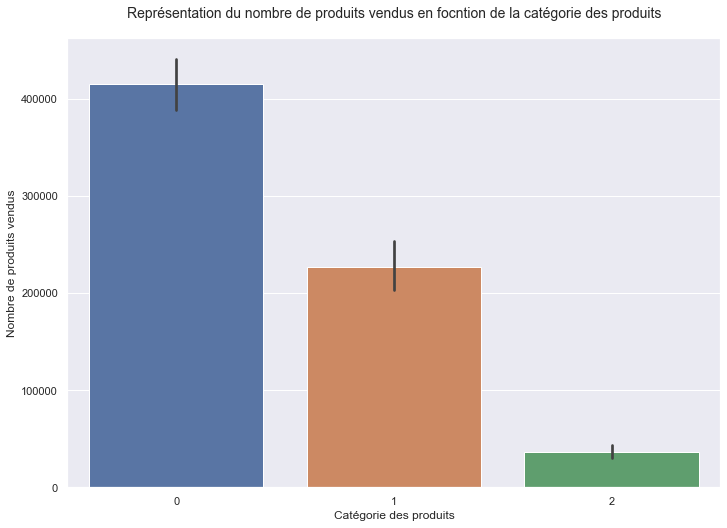

In [98]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = nb_sales, x = 'categ', y = 'sales', estimator = sum, order =['0','1','2'] )

plt.xlabel("Catégorie des produits") 
# Légende de l'axe x

plt.ylabel("Nombre de produits vendus")
# Légende de l'axe y

plt.title('Représentation du nombre de produits vendus en focntion de la catégorie des produits',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

In [99]:
nb_sales.iloc[:10]

,id_prod,categ,sales
229489,1_369,1,2245
125039,1_417,1,2183
199907,1_414,1,2178
73478,1_498,1,2122
232755,1_425,1,2095
161593,1_403,1,1956
253824,1_412,1,1950
344549,1_413,1,1942
180832,1_407,1,1933
120434,1_406,1,1932


In [100]:
nb_sales.iloc[-10:]

,id_prod,categ,sales
674766,0_833,0,1
678264,0_1284,0,1
678268,2_23,2,1
678280,0_549,0,1
678095,0_886,0,1
672305,0_1539,0,1
677673,0_541,0,1
677152,0_2201,0,1
669565,0_1379,0,1
678285,0_1633,0,1


Attention, il est à noter que nous demandons ici d'afficher les dix produits ayant enregistré le moins de ventes or il y en a beaucoup plus que 10.

In [101]:
nb_sales[nb_sales.sales <= 10].shape

(526, 3)

In [102]:
nb_sales.shape

(3265, 3)

Par exemple, il y a 526 produits ayant été achetés 10 fois ou moins sur les 3265 produits vendus sur le site soit 16% de nos produits.

### Tops et flops chez les particuliers

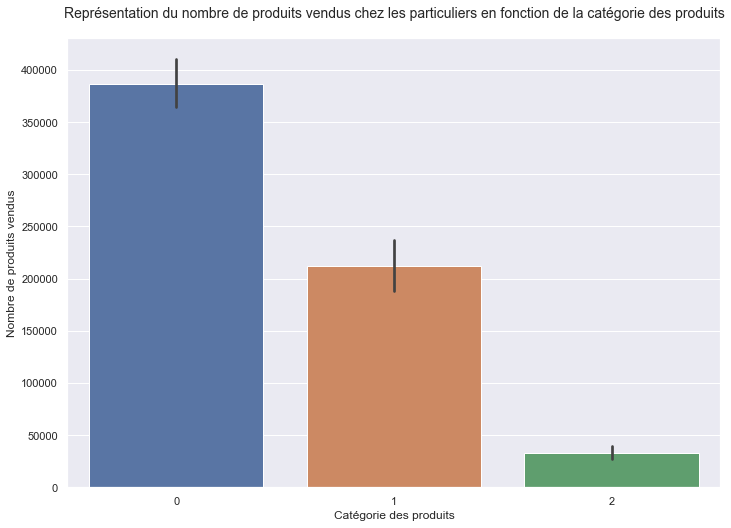

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = nb_sales_par, x = 'categ', y = 'sales', estimator = sum, order =['0','1','2'] )

plt.xlabel("Catégorie des produits") 
# Légende de l'axe x

plt.ylabel("Nombre de produits vendus")
# Légende de l'axe y

plt.title('Représentation du nombre de produits vendus chez les particuliers en fonction de la catégorie des produits',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Les particuliers achètent en majorité des produits de la catégorie 0.

In [104]:
nb_sales_par.iloc[:10]

,id_prod,categ,sales
229489,1_369,1,2112
199907,1_414,1,2046
125318,1_417,1,2042
73478,1_498,1,1965
232755,1_425,1,1961
253824,1_412,1,1852
345792,1_413,1,1843
180832,1_407,1,1816
343137,1_396,1,1798
120766,1_406,1,1798


In [105]:
nb_sales_par.iloc[-10:]

,id_prod,categ,sales
678280,0_549,0,1
641377,0_419,0,1
677755,0_1601,0,1
678264,0_1284,0,1
677152,0_2201,0,1
669565,0_1379,0,1
650061,1_514,1,1
667613,0_1726,0,1
663705,0_1820,0,1
678285,0_1633,0,1


### Tops et flops chez les professionnels

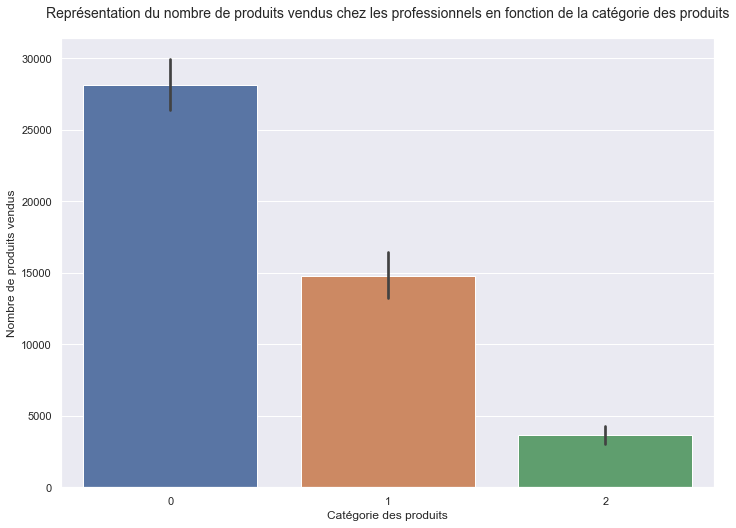

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = nb_sales_pro, x = 'categ', y = 'sales', estimator = sum, order =['0','1','2'] )

plt.xlabel("Catégorie des produits") 
# Légende de l'axe x

plt.ylabel("Nombre de produits vendus")
# Légende de l'axe y

plt.title('Représentation du nombre de produits vendus chez les professionnels en fonction de la catégorie des produits',fontsize = 14, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

In [107]:
nb_sales_pro.iloc[:10]

,id_prod,categ,sales
160342,1_403,1,163
72001,1_498,1,157
190901,1_395,1,152
125039,1_417,1,141
129739,1_400,1,141
115181,1_383,1,141
120434,1_406,1,134
232093,1_425,1,134
228979,1_369,1,133
201580,1_392,1,133


In [108]:
nb_sales_pro.iloc[-10:]

,id_prod,categ,sales
660869,0_77,0,1
661675,0_376,0,1
646589,0_522,0,1
659411,0_502,0,1
628418,1_430,1,1
663559,0_534,0,1
618900,1_69,1,1
654485,1_18,1,1
591812,1_298,1,1
628856,0_113,0,1


Que ce soit chez les particuliers ou chez les professionnels, il semble qu'ils privilégient les produits de la catégorie 1.

## Infos clients et répartion du chiffre d'affaires entre les clients

### Information sur les clients

In [109]:
clients.describe(include = 'all')

,client_id,sex,birth,age
count,8623,8623,8623.000000,8623.000000
unique,8623,2,NaN,NaN
top,c_4410,f,NaN,NaN
freq,1,4491,NaN,NaN
mean,NaN,NaN,1978.280877,44.719123
std,NaN,NaN,16.919535,16.919535
min,NaN,NaN,1929.000000,19.000000
25%,NaN,NaN,1966.000000,31.000000
50%,NaN,NaN,1979.000000,44.000000
75%,NaN,NaN,1992.000000,57.000000


Grâce à cette table, nous pouvons voir que 52% de nos clients en ligne sont des femmes.

Nous pouvons également constater que :
 - nos clients sont nés entre 1929 et 2004
 - la moitié est née entre 1929 et 1979, soit un écart de 50 ans
 - l'autre moitié est née entre 1979 et 2004, soit un écart de 25 ans

### Répartition du chiffre d'affaire entre les clients

Pour ce faire, nous allons créer une courbe de Lorenz.

Attention, cette courbe n'est représentative uniquement pour nos clients particuliers. 

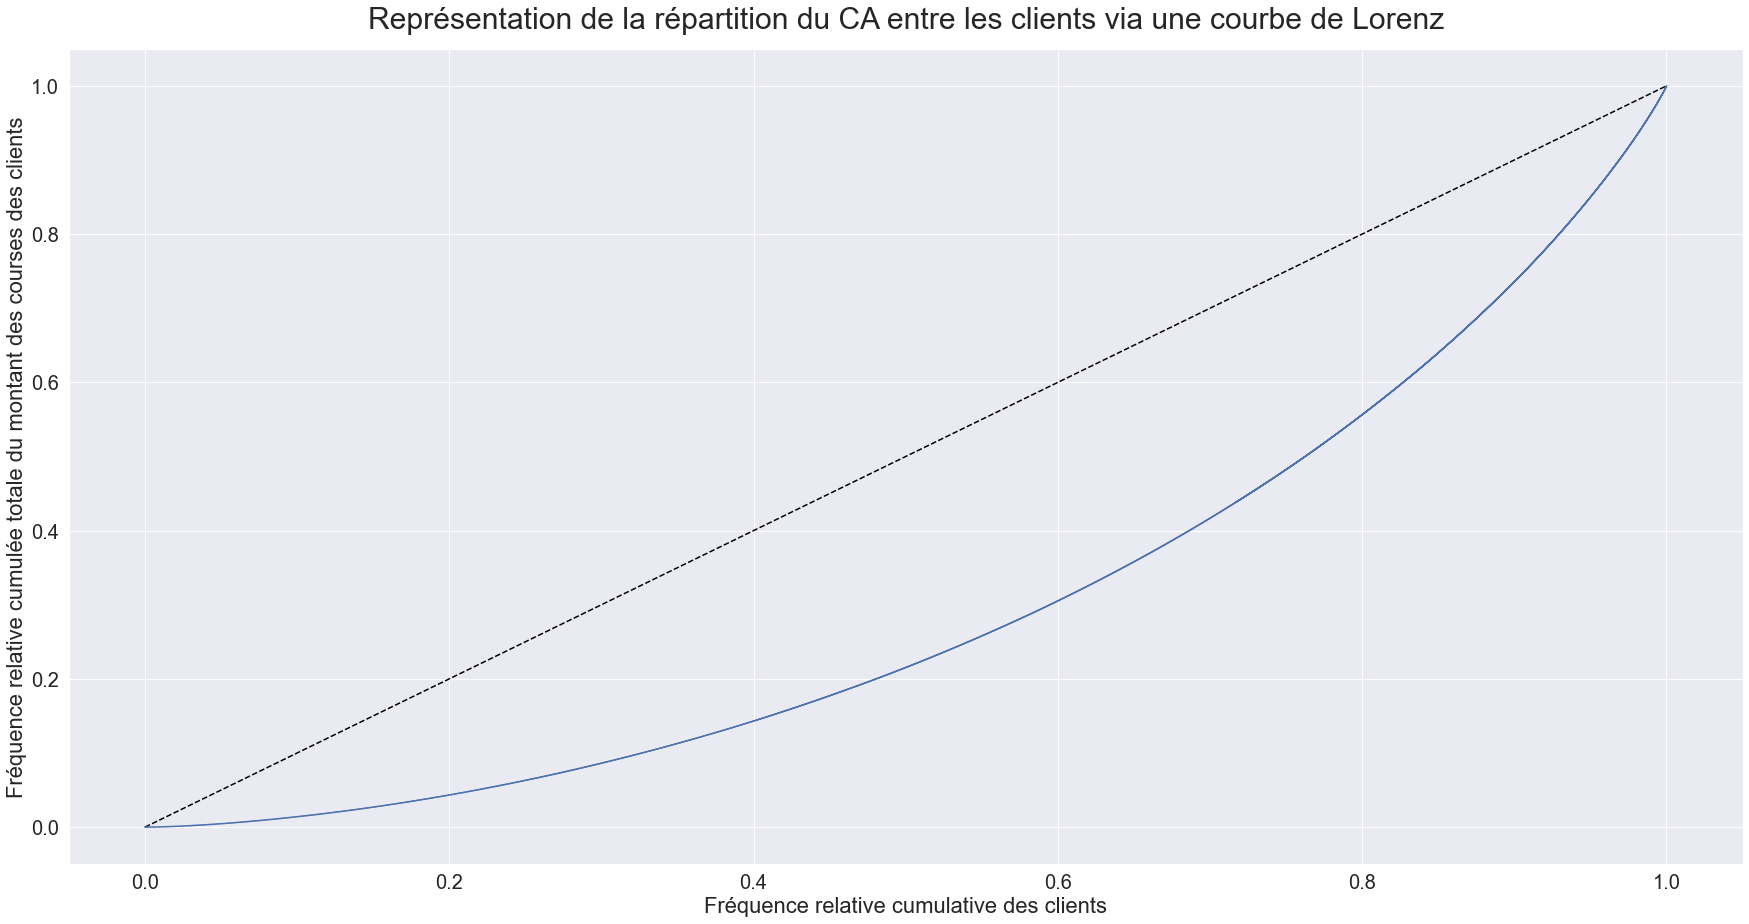

In [110]:
achat = depenses_par[depenses_par.price < 0]
ac = depenses_par.price.values
n = len(ac)
lorenz = np.cumsum(ac) / ac.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

sns.set(rc={'figure.figsize':(30,15)})
fig, ax = plt.subplots()
left = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
height = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.plot(left, height, linestyle='dashed', color='black')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.xlabel("Fréquence relative cumulative des clients", size =22) 
# Légende de l'axe x

plt.ylabel("Fréquence relative cumulée totale du montant des courses des clients", size =22)
# Légende de l'axe y

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Représentation de la répartition du CA entre les clients via une courbe de Lorenz',fontsize = 30, pad=20)
# Titre du graphique

plt.show()
# Montre le graphique

Sachant que la ligne en pointillé représente la distribution du CA entre les clients de manière parfaitement égalitaire, nous pouvons observer que les 20% des clients ayant le moins acheté représentent moins de 5% du CA total.

A l'inverse, les 20% de clients ayant le plus acheté représentent environ 45% du CA.

In [111]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.40249785445135855

Ce coefficient nous permet de déterminer que l'inégalité observée est moyenne.

# Analyses pour Julie

A la demande de Julie, nous allons chercher certaines corrélations, à savoir :
- le lien entre le genre d’un client et les catégories des livres achetés
- le lien entre l’âge des clients et le montant total des achats
- le lien entre l’âge des clients et la fréquence d’achat
- le lien entre l’âge des clients et la taille du panier moyen et 
- le lien entre l’âge des clients et les catégories des livres achetés.

Attention, il est à rappeler qu'ici, nous n'utiliserons que des tests non paramétriques pour la variable 'total_amount' (plus robuste par rapport aux données aberrantes observées pour les variables de prix!)

Nous allons télécharger les tests que nous utiliserons.

In [112]:
from scipy.stats import shapiro
# Permet de vérifier la distribution normale d'un échantillon

from scipy.stats import chi2_contingency
# Test d'indépendance dans le cas de deux variables qualitatives

from scipy.stats import spearmanr
# Test de corrélation non-paramétrique dans le cas de deux variables quantitatives

from scipy.stats import pearsonr
# Test de corrélation paramétrique dans le cas de deux variables quantitatives

from scipy.stats import kruskal
# Test de corrélation non_paramétrique dans le cas d'une variable quantitative et d'une variable qualitative à plus de deux modalités

## Lien entre le genre des clients et les catégories de livres vendus

Comme il s'agit de deux variables qualitatives, nous n'avons pas besoin de contrôler si la distribution de nos échantillon suit une loi normale.

Nous pouvons donc passer directement au test.

### Tous clients confondus

In [113]:
tab = pd.crosstab(ventes.sex,ventes.categ)
# Permet de créer une table de contingence 

tab

categ,0,1,2
sex,,,
f,205853,114760,17256
m,209162,112132,19128


In [114]:
chi2_contingency(tab)

(143.53191184535734,
 6.798942280722394e-32,
 2,
 array([[206726.46848477, 113019.00386117,  18123.52765406],
        [208288.53151523, 113872.99613883,  18260.47234594]]))

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre le genre de nos clients ainsi que les catégories des produits vendus.

### Clients particuliers

In [115]:
tab = pd.crosstab(ventes_par.sex,ventes_par.categ)

In [116]:
chi2_contingency(tab)

(20.309983241950736,
 3.8881514693086486e-05,
 2,
 array([[201297.68578321, 110356.02038296,  17046.29383382],
        [185561.31421679, 101728.97961704,  15713.70616618]]))

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre le genre de nos clients particuliers ainsi que les catégories des produits vendus.

### Clients professionnels

In [117]:
tab = pd.crosstab(ventes_pro.sex,ventes_pro.categ)

In [118]:
chi2_contingency(tab)

(485.0782354644873,
 4.640871283028745e-106,
 2,
 array([[ 5541.51080774,  2914.23321957,   713.2559727 ],
        [22614.48919226, 11892.76678043,  2910.7440273 ]]))

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre le genre de nos clients professionnels ainsi que les catégories des produits vendus.

## Lien entre l'âge des clients et le montant des achats

Ici, nous somme dans le cas de deux variables quantitatives mais nous n'allons pas vérifier la distribution des échantillons puisque la variable 'total_amount' est issue de la variable 'price' dont nous avons détectés des valeurs extrêmes.

De ce fait, nous allons réaliser le test non-paramétrique de Spearman.

### Tous clients confondus

In [119]:
spearmanr(panier.age,panier.total_amount)

SpearmanrResult(correlation=-0.33813676317857305, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients ainsi que le montant de leurs courses.

### Clients particuliers

In [120]:
spearmanr(panier_par.age,panier_par.total_amount)

SpearmanrResult(correlation=-0.34151140433999505, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients particuliers ainsi que le montant de leurs courses.

### Clients professionnels

In [121]:
spearmanr(panier_pro.age,panier_pro.total_amount)

SpearmanrResult(correlation=-0.20929791823665736, pvalue=2.1406396968612697e-226)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients professionnels ainsi que le montant de leurs courses.

## Lien entre l'âge des clients et la fréquence d'achat

### Tous cliens confondus

In [122]:
shapiro(freq.age)

C:\Users\Elenweii\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9697483777999878, pvalue=4.6344191227658934e-39)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que l'échantillon suit une loi normale, est rejetée.

Nous allons donc utiliser le test de Spearman.

In [123]:
spearmanr(freq.age,freq.frq_sales)

SpearmanrResult(correlation=0.21209989410295918, pvalue=4.658792495154888e-88)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients et leur fréquence d'achat.

### Clients particuliers

In [124]:
shapiro(freq_par.age)

ShapiroResult(statistic=0.9697322845458984, pvalue=4.6241265855454276e-39)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que l'échantillon suit une loi normale, est rejetée.

Nous allons donc utiliser le test de Spearman.

In [125]:
spearmanr(freq_par.age,freq_par.frq_sales)

SpearmanrResult(correlation=0.212296770973657, pvalue=3.5049079111602286e-88)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients particuliers et leur fréquence d'achat.

### Clients professionnels

In [126]:
shapiro(freq_pro.age)

ShapiroResult(statistic=0.860487699508667, pvalue=0.26196327805519104)

Ici, notre p-value est supérieure à 0.05, donc nous acceptons l'hypothèse comme quoi la variable suit une distribution normale.

Nous allons faire de même avec la seconde variable de notre test.

In [127]:
shapiro(freq_pro.frq_sales)

ShapiroResult(statistic=0.8914578557014465, pvalue=0.38987967371940613)

Ici également, la variable suit une loi normale, donc nous allons faire un Test de Pearson.

In [128]:
pearsonr(freq_pro.age,freq_pro.frq_sales)

(-0.021907250277364787, 0.9780927497226353)

Puisque nous avons une p-value très supérieure à 0.05, notre hypothèse nulle est vérifiée.

Autrement dit, il n'existe aucun lien entre l'âge de nos clients professionnels et leur fréquence d'achat.

Attention toutefois, car la table dont sont issues nos données pour faire ce test ne contient que quatre lignes de données, une pour chaque client.

Il nous faudrait au moins une centaine de clients professionnels avec leurs données nécessaire pour confirmer ou infirmer l'indépendance des variables.

## Lien entre l'âge des clients et la taille du panier moyen

### Tous cliens confondus

In [129]:
spearmanr(panier.age,panier.nb_product_sales)

SpearmanrResult(correlation=-0.2196492392707633, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients et la taille de leurs paniers.

### Clients particuliers

In [130]:
spearmanr(panier_par.age,panier_par.nb_product_sales)

SpearmanrResult(correlation=-0.23395872076608598, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients particuliers et la taille de leurs paniers.

### Clients professionnels

In [131]:
spearmanr(panier_pro.age,panier_pro.nb_product_sales)

SpearmanrResult(correlation=0.09824496798735093, pvalue=1.6231130268735583e-50)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que nos variables sont indépendantes, est rejetée.

Il existe donc un lien entre l'âge de nos clients professionnels et la taille de leurs paniers.

## Lien entre l'âge des clients et les catégories de livres vendus

### Tous clients confondus

In [132]:
Categ0=ventes.loc[:,['categ','age']]
Categ0=Categ0[Categ0.categ=='0']

In [133]:
Categ1=ventes.loc[:,['categ','age']]
Categ1=Categ1[Categ1.categ=='1']

In [134]:
Categ2=ventes.loc[:,['categ','age']]
Categ2=Categ2[Categ2.categ=='2']

In [135]:
shapiro(Categ0.age)

C:\Users\Elenweii\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9360267519950867, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que l'échantillon suit une loi normale, est rejetée.

Nous allons donc utiliser le test de Kruskal-Wallis.

In [136]:
kruskal(Categ0.age,Categ1.age,Categ2.age)

KruskalResult(statistic=79093.3364168275, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que les moyennes de nos variables sont identiques, est rejetée.

Il existe donc un lien entre le genre de nos clients ainsi que les catégories des produits vendus.

### Clients particuliers

In [137]:
Categ0=ventes_par.loc[:,['categ','age']]
Categ0=Categ0[Categ0.categ=='0']

In [138]:
Categ1=ventes_par.loc[:,['categ','age']]
Categ1=Categ1[Categ1.categ=='1']

In [139]:
Categ2=ventes_par.loc[:,['categ','age']]
Categ2=Categ2[Categ2.categ=='2']

In [140]:
shapiro(Categ0.age)

C:\Users\Elenweii\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9344656467437744, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que l'échantillon suit une loi normale, est rejetée.

Nous allons donc utiliser le test de Kruskal-Wallis.

In [141]:
kruskal(Categ0.age,Categ1.age,Categ2.age)

KruskalResult(statistic=71983.22535522432, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que les moyennes de nos variables sont identiques, est rejetée.

Il existe donc un lien entre le genre de nos clients particuliers ainsi que les catégories des produits vendus.

### Clients professionnels

In [142]:
Categ0=ventes_pro.loc[:,['categ','age']]
Categ0=Categ0[Categ0.categ=='0']

In [143]:
Categ1=ventes_pro.loc[:,['categ','age']]
Categ1=Categ1[Categ1.categ=='1']

In [144]:
Categ2=ventes_pro.loc[:,['categ','age']]
Categ2=Categ2[Categ2.categ=='2']

In [145]:
shapiro(Categ0.age)

C:\Users\Elenweii\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5782636404037476, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que l'échantillon suit une loi normale, est rejetée.

Nous allons donc utiliser le test de Kruskal-Wallis.

In [146]:
kruskal(Categ0.age,Categ1.age,Categ2.age)

KruskalResult(statistic=8106.105971500954, pvalue=0.0)

Avec une p-value inférieure à 0.05, l'hypothèse nulle, à savoir que les moyennes de nos variables sont identiques, est rejetée.

Il existe donc un lien entre le genre de nos clients professionnels ainsi que les catégories des produits vendus.

# Conclusion

Pour conclure, nous rappellerons les points importants soulevés dans les analyses :
- Au bout de deux ans de service, le site a enregistré un chiffre d'affaires de 11 853 728.68 €
- 92.6% du chiffre d'affaires est issue des ventes aux clients particuliers
- Une baisse importante du chiffre d'affaires a été enregistré en octobre 2021
- La tendance globale a montré un pic entre février et avril 2022 avant de finalement se stabiliser
- 20% des clients ayant le plus acheté sur le site ont fourni environ 45% du chiffre d'affaires pour les particuliers

En ce qui concerne les possibles lien entre des différentes variables demandés par Julie, nous pouvons retenir :
- tous les test effectués ont montré un lien que ce soit entre le genre ou l'âge des clients avec la catégorie de produits achetés, la fréquence d'achat, le montant des courses et la taille des paniers
- la seule exception semble être entre l'âge des clients professionnels et leur fréquence d'achat, cependant cela est à prendre avec des pincettes puisque nous ne disposons pas de données suffisantes

En ce qui concerne la qualité des données, nous retiendrons ceci :
- Il n'y avait pas d'unité fournie pour la variable 'price', nous avons dû supposer que cela était en euro
- les données des tests du site ont été conservées

Je recommanderais en premier lieu, à l'issu de nos analyses :
- de vérifier l'état des stocks, via un ERP par exemple
- de proposer une démarche publicitaire en ciblant en  priorité nos clients particuliers qui achètent le plus avec des produits qu'ils sont susceptibles d'acheter

Enfin, au niveau de la qualité des données, je recommanderais de fournir :
- l'unité des variables comme le prix des produits
- le catalogue des produits avec leur descriptif comme leur nom
- de supprimer les données liées aux test du site de la base de données